<a href="https://colab.research.google.com/github/costpetrides/Weather-Prediction-Using-ML/blob/main/Weather-Prediction-Using-ML/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import scipy
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv("dataset.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


<ipython-input-10-a76c70747aac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='weather_encoded', data=data, palette='mako')
<ipython-input-10-a76c70747aac>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(weather_names.values()))


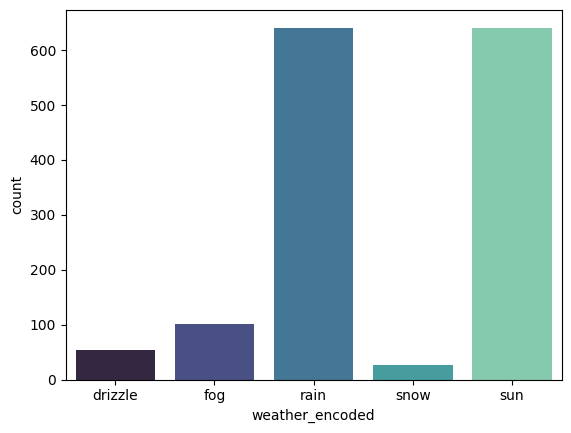

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a label encoder object
le = LabelEncoder()

# Fit the encoder to the weather column and transform the values
data['weather_encoded'] = le.fit_transform(data['weather'])

# Create a dictionary that maps the encoded values to the actual names
weather_names = dict(zip(le.transform(le.classes_), le.classes_))

# Plot the count of each unique value in the weather column with actual names on the labels
ax = sns.countplot(x='weather_encoded', data=data, palette='mako')

# Set the x-tick labels to actual weather names
ax.set_xticklabels(list(weather_names.values()))

# Show the plot
plt.show()

In [11]:
# Get the value counts of each unique value in the weather column
weather_counts = data['weather'].value_counts()

# Print the percentage of each unique value in the weather column
for weather, count in weather_counts.items():
    percent = (count / len(data)) * 100
    print(f"Percent of {weather.capitalize()}: {percent:.2f}%")

Percent of Rain: 43.87%
Percent of Sun: 43.81%
Percent of Fog: 6.91%
Percent of Drizzle: 3.63%
Percent of Snow: 1.78%


In [12]:
data[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


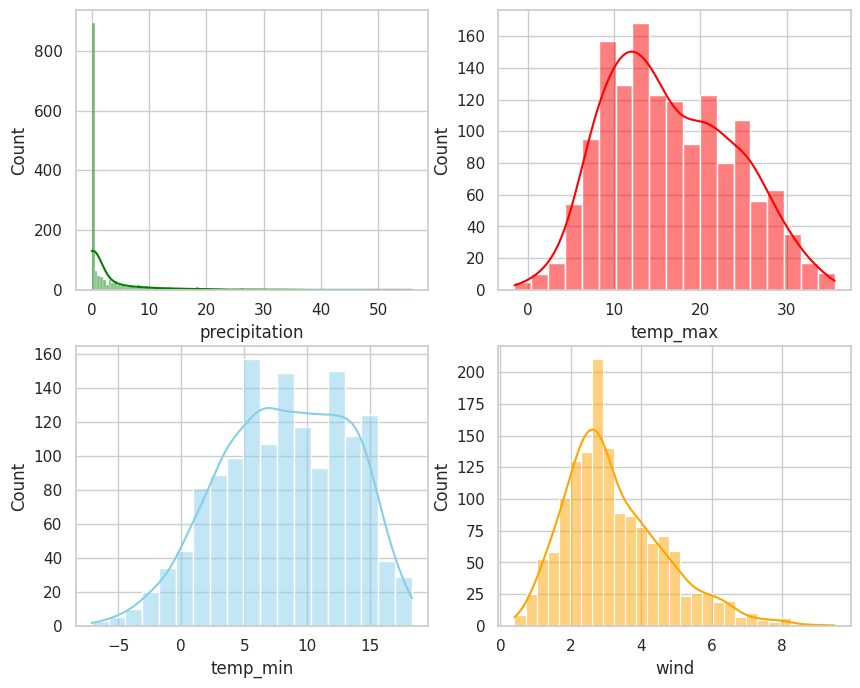

In [14]:
sns.set(style="whitegrid")

# Define the variables and colors for the subplots
variables = ["precipitation", "temp_max", "temp_min", "wind"]
colors = ["green", "red", "skyblue", "orange"]

# Create the subplots using a loop
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, var in enumerate(variables):
    sns.histplot(data=data, x=var, kde=True, ax=axs[i//2, i%2], color=colors[i])

<ipython-input-16-49f51ca078bd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="precipitation", y="weather", data=data, palette="winter", ax=ax)


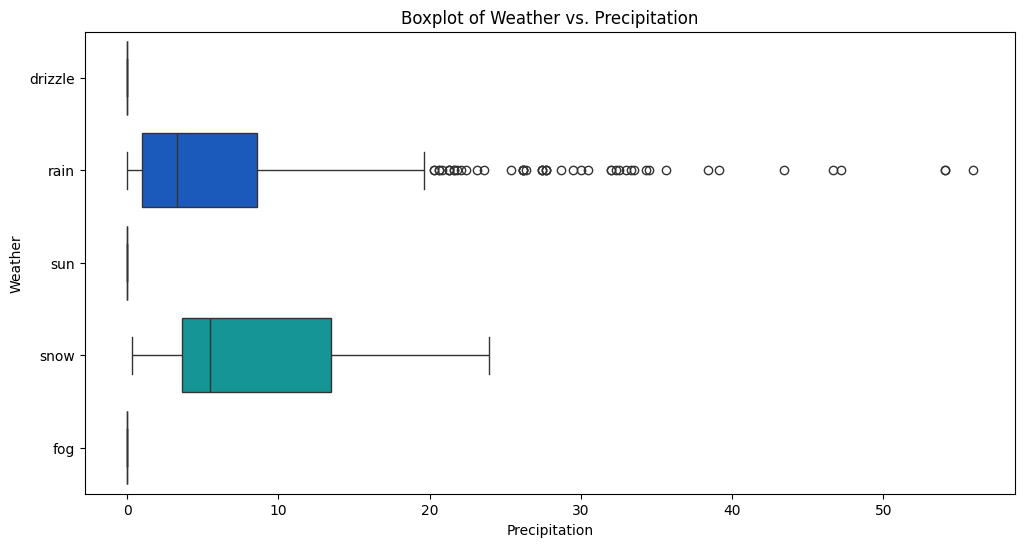

In [16]:
with plt.style.context('default'):

    # Create a figure with the specified size and an axis object
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot a boxplot with the given data, using the specified x and y variables, color palette, and axis object
    sns.boxplot(x="precipitation", y="weather", data=data, palette="winter", ax=ax)

    # Optional: set axis labels and title if desired
    ax.set(xlabel='Precipitation', ylabel='Weather', title='Boxplot of Weather vs. Precipitation')

<ipython-input-17-8311b1f526b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_max", y="weather", data=data, palette="spring", ax=ax)


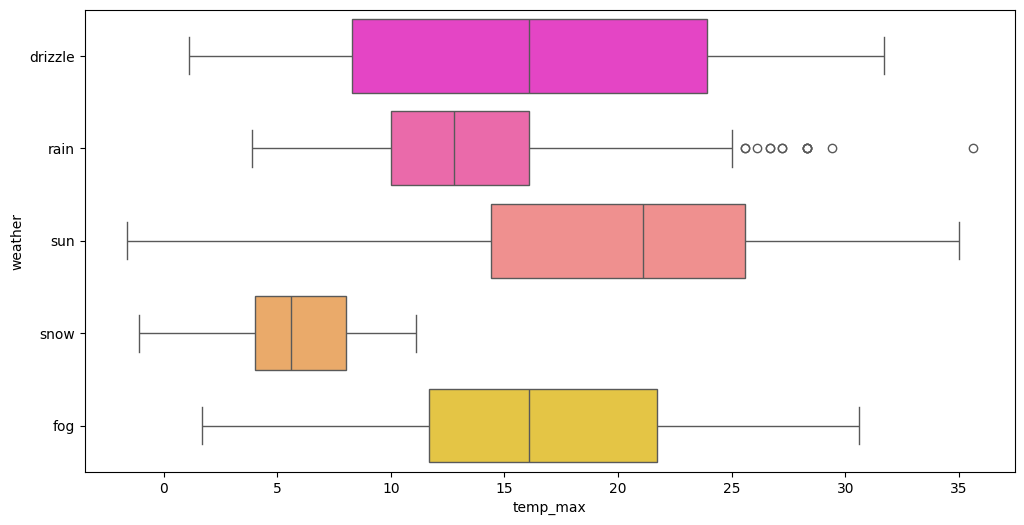

In [17]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_max", y="weather", data=data, palette="spring", ax=ax)

<ipython-input-18-031f230c8b51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wind", y="weather", data=data, palette="summer", ax=ax)


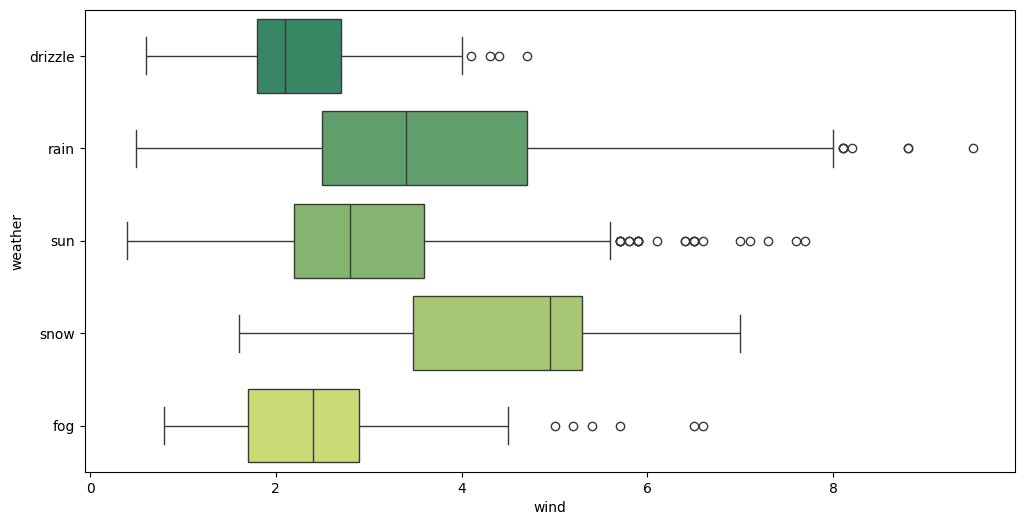

In [18]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="wind", y="weather", data=data, palette="summer", ax=ax)

<ipython-input-19-c5f553a3edf2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_min", y="weather", data=data, palette="autumn", ax=ax)


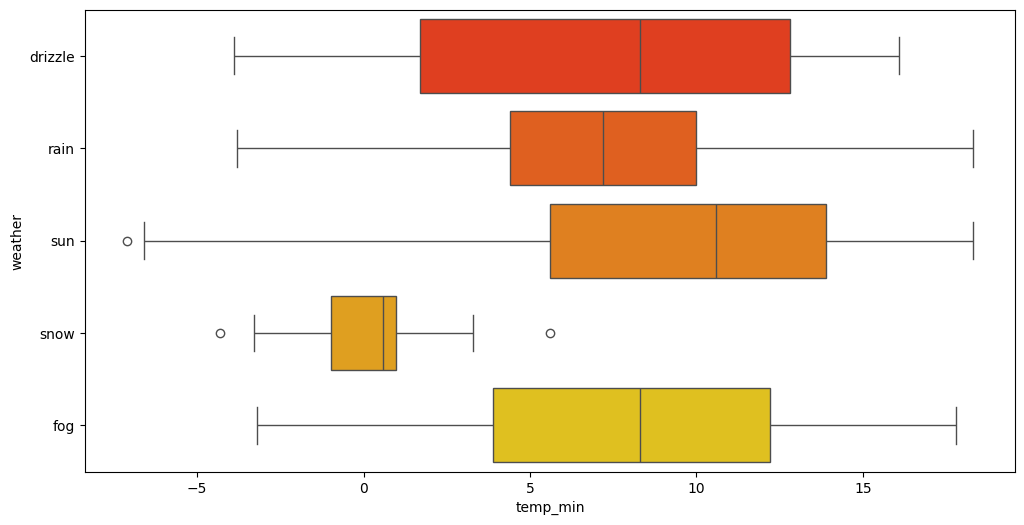

In [19]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_min", y="weather", data=data, palette="autumn", ax=ax)

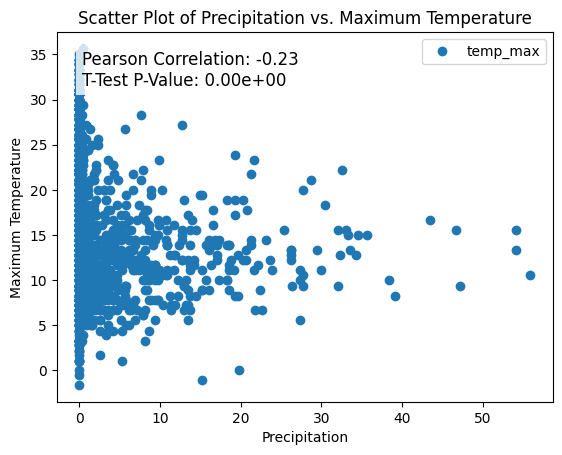

In [20]:
# Calculate the Pearson correlation coefficient and t-test p-value between the precipitation and temp_max variables
corr = data["precipitation"].corr(data["temp_max"])
ttest, pvalue = stats.ttest_ind(data["precipitation"],data["temp_max"])

# Use a context manager to apply the default style to the plot
with plt.style.context('default'):

    # Create a scatter plot of the precipitation and temp_max variables
    ax = data.plot("precipitation", "temp_max", style='o')

    # Add a title to the plot
    ax.set_title('Scatter Plot of Precipitation vs. Maximum Temperature')

    # Add labels to the x and y axes
    ax.set_xlabel('Precipitation')
    ax.set_ylabel('Maximum Temperature')

    # Add a text box to the plot with the Pearson correlation coefficient and t-test p-value
    textstr = f'Pearson Correlation: {corr:.2f}\nT-Test P-Value: {pvalue:.2e}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

[Text(0.5, 1.0, 'Scatter plot of Wind vs. Maximum Temperature')]

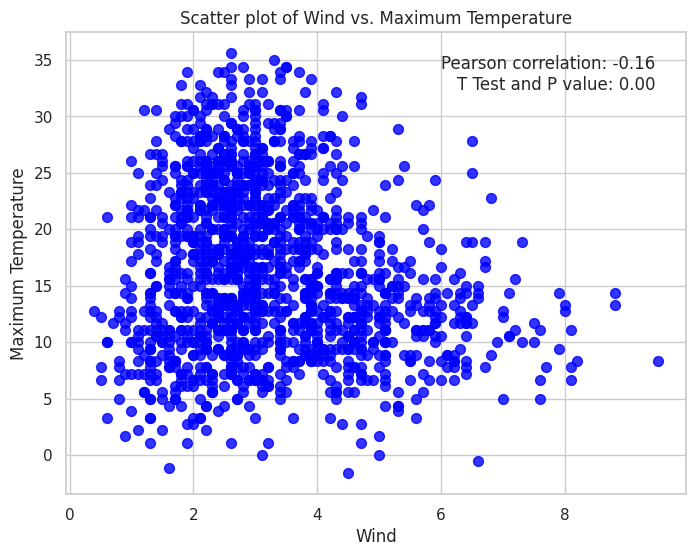

In [21]:
# Create a scatter plot with custom markers and colors, and specify axis object explicitly
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=data["wind"], y=data["temp_max"], marker='o', s=50, alpha=0.8, color='blue')

# Calculate Pearson correlation coefficient and p-value
corr, p_value = np.corrcoef(data["wind"], data["temp_max"])[0, 1], np.mean(np.abs(stats.ttest_ind(data["wind"], data["temp_max"])[1]))

# Display the correlation and p-value on the plot
ax.text(0.95, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Add labels to the x and y axis
ax.set(xlabel='Wind', ylabel='Maximum Temperature')

# Add a title to the plot
ax.set(title='Scatter plot of Wind vs. Maximum Temperature')

[Text(0.5, 1.0, 'Scatter plot of Maximum vs. Minimum Temperature')]

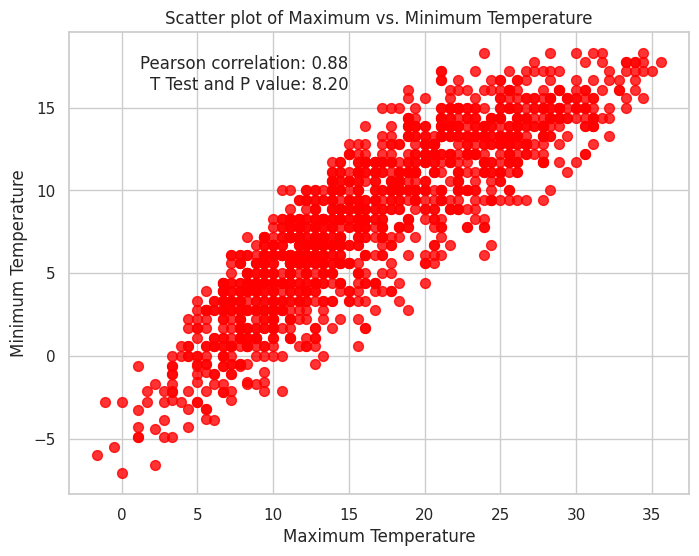

In [22]:
# Create a scatter plot with custom markers and colors, and specify axis object explicitly
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=data["temp_max"], y=data["temp_min"], marker='o', s=50, alpha=0.8, color='red')

# Calculate Pearson correlation coefficient and p-value
corr, p_value = np.corrcoef(data["temp_max"], data["temp_min"])[0, 1], np.mean(np.abs(np.subtract(data["temp_max"], data["temp_min"])))

# Display the correlation and p-value on the plot
ax.text(0.45, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Add labels to the x and y axis
ax.set(xlabel='Maximum Temperature', ylabel='Minimum Temperature')

# Add a title to the plot
ax.set(title='Scatter plot of Maximum vs. Minimum Temperature')

# HANDLING NULL VALUES

In [23]:
# Find the total number of null values in each column
null_count = data.isnull().sum()

# Print the number of null values in each column
print(null_count)

date               0
precipitation      0
temp_max           0
temp_min           0
wind               0
weather            0
weather_encoded    0
dtype: int64


# DATA PROCESSING AND CLEANING:

In [24]:
# Drop the "date" column from the dataframe
df = data.drop("date", axis=1)

# Display the first 5 rows of the resulting dataframe
df.head()

,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,0.0,12.8,5.0,4.7,drizzle,0
1,10.9,10.6,2.8,4.5,rain,2
2,0.8,11.7,7.2,2.3,rain,2
3,20.3,12.2,5.6,4.7,rain,2
4,1.3,8.9,2.8,6.1,rain,2


In [26]:
# Take the square root of the "precipitation" column
df["precipitation"] = np.sqrt(df["precipitation"])

# Take the square root of the "wind" column
df["wind"] = np.sqrt(df["wind"])

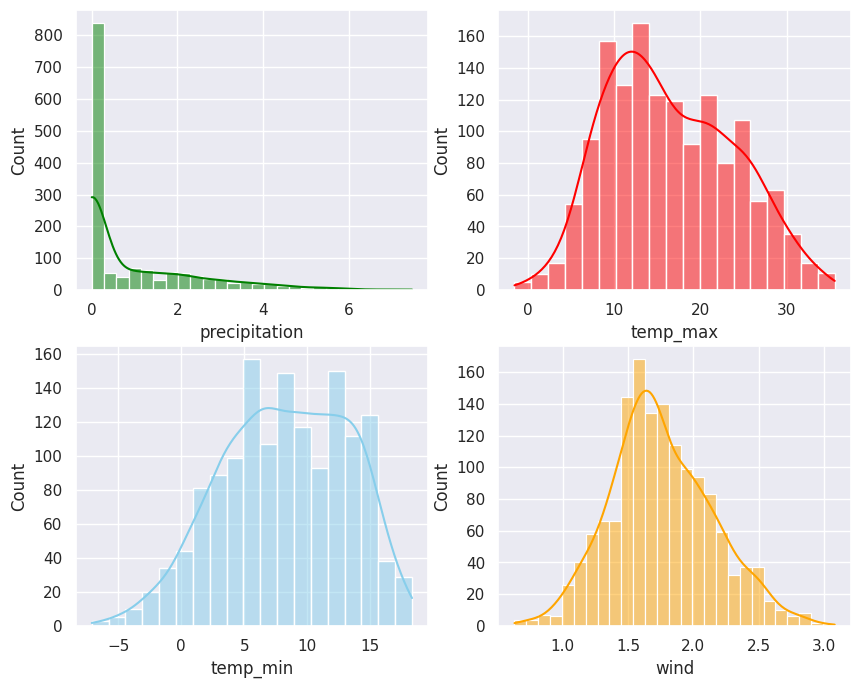

In [27]:
# set the plot style to darkgrid
sns.set(style="darkgrid")

# create a 2x2 subplot grid with a specified size
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# loop through each column and its index in the dataframe
for i, column in enumerate(["precipitation", "temp_max", "temp_min", "wind"]):

    # create a histogram plot for the current column, with a kernel density estimate
    # set the current axis to the appropriate subplot in the grid
    # set the color of the histogram based on the index of the current column
    sns.histplot(data=df, x=column, kde=True, ax=axs[i//2, i%2], color=['green', 'red', 'skyblue', 'orange'][i])

In [28]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,0.000000,12.8,5.0,2.167948,drizzle,0
1,3.301515,10.6,2.8,2.121320,rain,2
2,0.894427,11.7,7.2,1.516575,rain,2
3,4.505552,12.2,5.6,2.167948,rain,2
4,1.140175,8.9,2.8,2.469818,rain,2


In [30]:
#we no longer need weather column
if "weather" in df.columns:
    df = df.drop("weather", axis=1)

x = ((df.loc[:,df.columns!="weather_encoded"]).astype(int)).values[:,0:]
y = df["weather_encoded"].values

In [31]:
df.weather_encoded.unique()

array([0, 2, 4, 3, 1])

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# create a KNN classifier and fit it to the training data
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# calculate the accuracy score of the KNN classifier on the test data
knn_score = knn.score(x_test, y_test)
print("KNN Accuracy:", knn_score)


KNN Accuracy: 0.7414965986394558


In [34]:
# use the KNN classifier to predict the labels of the test data
y_pred_knn = knn.predict(x_test)

# create a confusion matrix of the KNN classifier's predictions
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# print the confusion matrix
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[ 0  1  0  0  4]
 [ 0  0  0  0  5]
 [ 0  0 66  0 13]
 [ 0  0  2  3  1]
 [ 1  4  7  0 40]]


In [36]:
# print classification report for KNN
print('KNN Classification Report\n')
# set zero_division parameter to 0 to avoid warning in case of empty classes
print(classification_report(y_test, y_pred_knn, zero_division=0))

KNN Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.88      0.84      0.86        79
           3       1.00      0.50      0.67         6
           4       0.63      0.77      0.70        52

    accuracy                           0.74       147
   macro avg       0.50      0.42      0.44       147
weighted avg       0.74      0.74      0.73       147



In [37]:
# Import the DecisionTreeClassifier from Scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Define a range of maximum depths to try
max_depth_range = range(1, 8)

# Create a DecisionTreeClassifier for each maximum depth and evaluate its accuracy
for depth in max_depth_range:
    # Create a DecisionTreeClassifier with the current maximum depth, maximum number of leaf nodes, and a random seed
    dec = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=15, random_state=0)

    # Fit the DecisionTreeClassifier on the training data
    dec.fit(x_train, y_train)

    # Calculate the accuracy of the DecisionTreeClassifier on the test data
    dec_score = dec.score(x_test, y_test)

    # Print the accuracy of the DecisionTreeClassifier for the current maximum depth
    print(f"Decision Tree Accuracy with max depth {depth}: {dec_score}")

Decision Tree Accuracy with max depth 1: 0.782312925170068
Decision Tree Accuracy with max depth 2: 0.7959183673469388
Decision Tree Accuracy with max depth 3: 0.8095238095238095
Decision Tree Accuracy with max depth 4: 0.8095238095238095
Decision Tree Accuracy with max depth 5: 0.8027210884353742
Decision Tree Accuracy with max depth 6: 0.8095238095238095
Decision Tree Accuracy with max depth 7: 0.8095238095238095


In [38]:
# Use the DecisionTreeClassifier to predict classes for the test data
y_pred_dec = dec.predict(x_test)

# Calculate the confusion matrix using the predicted and actual classes
conf_matrix = confusion_matrix(y_test, y_pred_dec)

# Print the confusion matrix to the console
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  0  0  0  5]
 [ 0  0  0  0  5]
 [ 0  0 63  1 15]
 [ 0  0  1  4  1]
 [ 0  0  0  0 52]]


In [39]:
print('Decision Tree\n',classification_report(y_test,y_pred_dec, zero_division=0))

Decision Tree
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.98      0.80      0.88        79
           3       0.80      0.67      0.73         6
           4       0.67      1.00      0.80        52

    accuracy                           0.81       147
   macro avg       0.49      0.49      0.48       147
weighted avg       0.80      0.81      0.79       147



In [40]:
# Import the LogisticRegression class from Scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
lg = LogisticRegression()

# Train the Logistic Regression classifier on the training data
lg.fit(x_train, y_train)

# Calculate the accuracy of the Logistic Regression classifier on the test data
lg_score = lg.score(x_test, y_test)

# Print the accuracy of the Logistic Regression classifier
print(f"Logistic Regression Accuracy: {lg_score}")

Logistic Regression Accuracy: 0.8095238095238095


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# Use the trained Logistic Regression classifier to predict labels for the test data
y_pred_lg = lg.predict(x_test)

# Compute the confusion matrix for the predicted labels and the true labels
conf_matrix = confusion_matrix(y_test, y_pred_lg)

# Print the confusion matrix to the console
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  0  1  0  4]
 [ 0  0  0  0  5]
 [ 0  0 65  0 14]
 [ 0  0  3  2  1]
 [ 0  0  0  0 52]]


In [42]:
print('Logistic Regression\n',classification_report(y_test,y_pred_lg, zero_division=0))

Logistic Regression
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.94      0.82      0.88        79
           3       1.00      0.33      0.50         6
           4       0.68      1.00      0.81        52

    accuracy                           0.81       147
   macro avg       0.53      0.43      0.44       147
weighted avg       0.79      0.81      0.78       147



<ipython-input-43-c978d1e5c374>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracies, palette="mako", saturation=1.5)


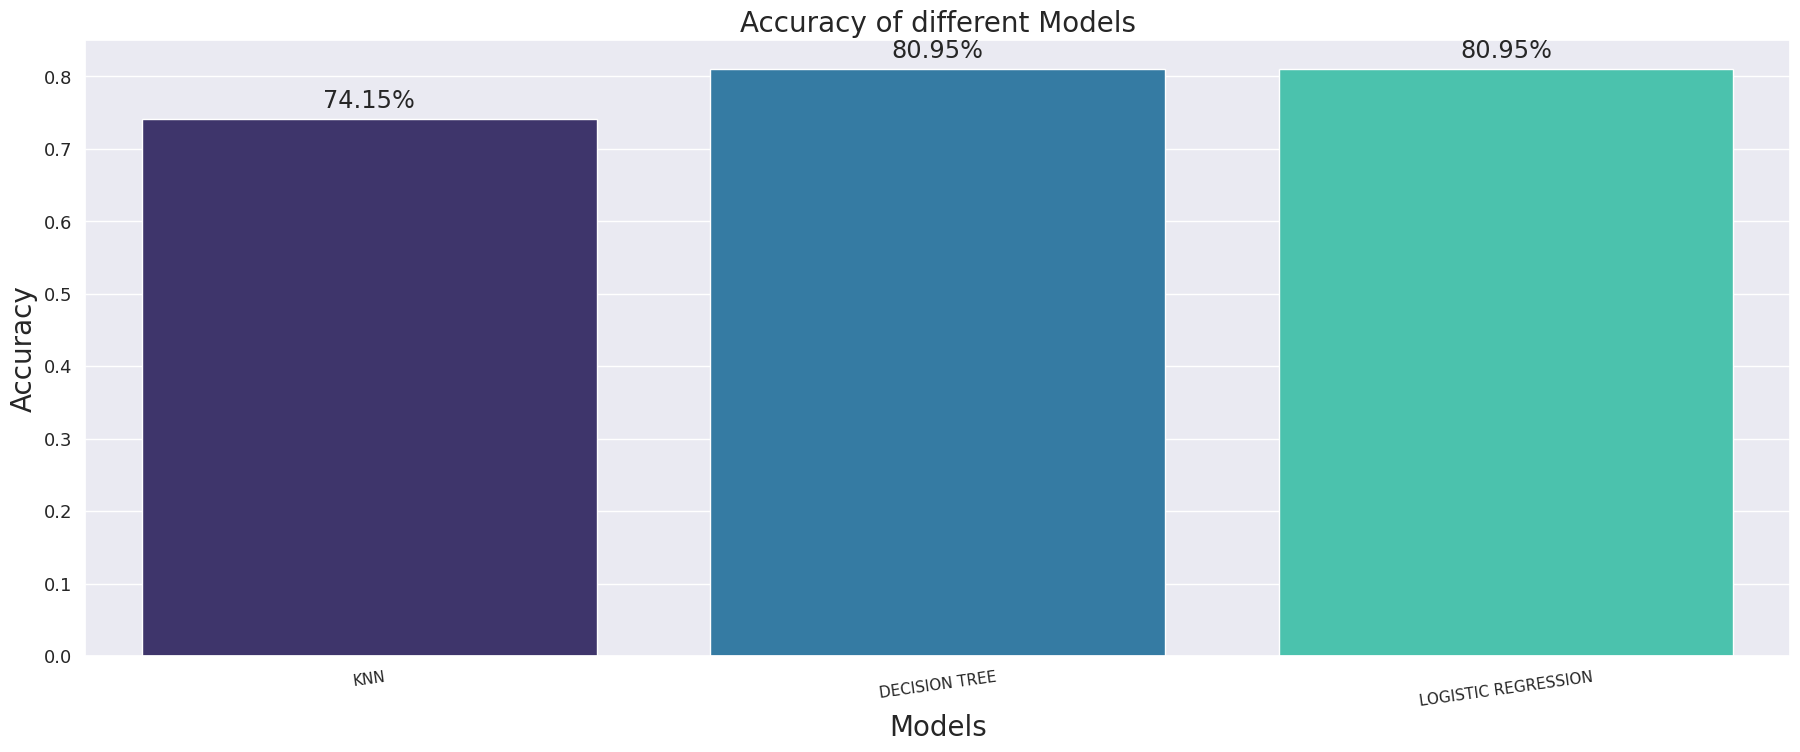

In [43]:
models = ["KNN", "DECISION TREE", "LOGISTIC REGRESSION"]
accuracies = [knn_score, dec_score, lg_score]

sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=models, y=accuracies, palette="mako", saturation=1.5)
plt.xlabel("Models", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy of different Models", fontsize=20)
plt.xticks(fontsize=11, horizontalalignment="center", rotation=8)
plt.yticks(fontsize=13)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width()/2, p.get_height()*1.02), ha='center', fontsize='x-large')

plt.show()


In [44]:
# Load the CSV file into a DataFrame
df_date = pd.read_csv("dataset.csv")

# Display the first five rows of the DataFrame
print(data.head())

         date  precipitation  temp_max  temp_min  wind  weather  \
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle   
1  2012-01-02           10.9      10.6       2.8   4.5     rain   
2  2012-01-03            0.8      11.7       7.2   2.3     rain   
3  2012-01-04           20.3      12.2       5.6   4.7     rain   
4  2012-01-05            1.3       8.9       2.8   6.1     rain   

   weather_encoded  
0                0  
1                2  
2                2  
3                2  
4                2  


In [45]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [46]:
df_date.date = pd.to_datetime(df_date.date).dt.month
df_date.date

,date
0,1
1,1
2,1
3,1
4,1
...,...
1456,12
1457,12
1458,12
1459,12


In [47]:
df_date = df_date.rename(columns = {'date':'month'})
df_date.head()

,month,precipitation,temp_max,temp_min,wind,weather
0,1,0.0,12.8,5.0,4.7,drizzle
1,1,10.9,10.6,2.8,4.5,rain
2,1,0.8,11.7,7.2,2.3,rain
3,1,20.3,12.2,5.6,4.7,rain
4,1,1.3,8.9,2.8,6.1,rain


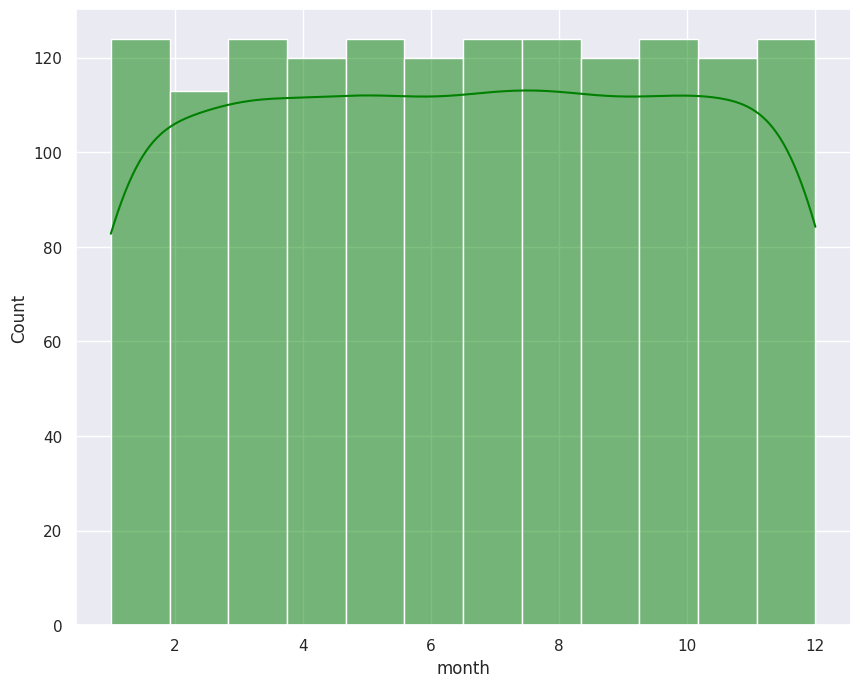

In [48]:
# Set the style to "darkgrid"
sns.set(style="darkgrid")

# Create a figure and axes object with a specified size
fig, axs = plt.subplots(figsize=(10, 8))

# Create a histogram plot of the "month" column in the "df_date" dataframe with a kernel density estimate
plot = sns.histplot(data=df_date, x="month", kde=True, color='green')

In [50]:
df_date.precipitation=np.sqrt(df_date.precipitation)
df_date.wind=np.sqrt(df_date.wind)

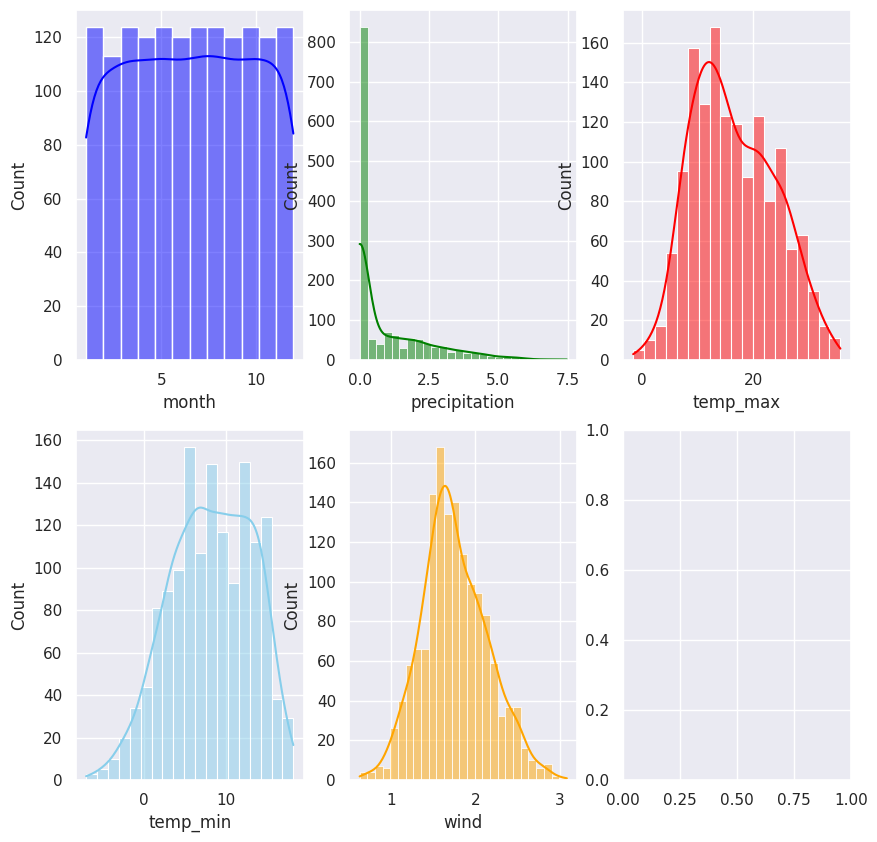

In [51]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(10, 10))

plots = ["month", "precipitation", "temp_max", "temp_min", "wind"]

for i, plot in enumerate(plots):
    sns.histplot(data=df_date, x=plot, kde=True, ax=axs[i//3, i%3], color=["blue", "green", "red", "skyblue", "orange"][i])


In [52]:
# Create a LabelEncoder object
lc_date = LabelEncoder()

# Encode the "weather" column of the DataFrame and replace it with the encoded values
df_date["weather"] = lc_date.fit_transform(df_date["weather"])

# Display the first few rows of the DataFrame to confirm the encoding
df_date.head()

,month,precipitation,temp_max,temp_min,wind,weather
0,1,0.000000,12.8,5.0,2.167948,0
1,1,3.301515,10.6,2.8,2.121320,2
2,1,0.894427,11.7,7.2,1.516575,2
3,1,4.505552,12.2,5.6,2.167948,2
4,1,1.140175,8.9,2.8,2.469818,2


In [53]:
# Extract the feature and target variables from the DataFrame
# Convert the features to integers and exclude the "weather" column
x_date = df_date.loc[:, df_date.columns != "weather"].astype(int).values

# Get the target variable as an array of values
y_date = df_date["weather"].values

In [54]:
# Split the "x_date" and "y_date" datasets into training and testing sets
# with a test size of 0.1 (10% of the data) and a random state of 2 for reproducibility
x_train_date, x_test_date, y_train_date, y_test_date = train_test_split(x_date, y_date, test_size=0.1, random_state=2)


# K-NEIGHBOR NEAREST CLASSIFIER.

In [55]:
# Create a KNeighborsClassifier object
knn_date = KNeighborsClassifier()

# Fit the model to the training data
knn_date.fit(x_train_date, y_train_date)

# Compute the accuracy score on the test data
knn_date_score = knn_date.score(x_test_date, y_test_date)

# Print the accuracy score
print("KNN Accuracy (with month column):", knn_date_score)

KNN Accuracy (with month column): 0.7959183673469388


In [56]:
# Use the KNN model to predict the target variable for the test set
y_pred_knn_date = knn_date.predict(x_test_date)

# Compute the confusion matrix for the KNN model predictions
conf_matrix_knn_date = confusion_matrix(y_test_date, y_pred_knn_date)

# Print the confusion matrix to the console
print("Confusion Matrix (with month column)")
print(conf_matrix_knn_date)

Confusion Matrix (with month column)
[[ 0  1  0  0  4]
 [ 1  0  0  0  4]
 [ 1  0 68  0 10]
 [ 0  0  4  2  0]
 [ 1  1  3  0 47]]


In [57]:
print('KNN (with month column)\n',classification_report(y_test_date,y_pred_knn_date, zero_division=0))

KNN (with month column)
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.91      0.86      0.88        79
           3       1.00      0.33      0.50         6
           4       0.72      0.90      0.80        52

    accuracy                           0.80       147
   macro avg       0.53      0.42      0.44       147
weighted avg       0.78      0.80      0.78       147



# DECISION TREE.

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Import the DecisionTreeClassifier model from sklearn.tree
# Create a list of values for the "max_depth" parameter to test
max_depth_range_date = list(range(1, 8))

# Loop through each value of "max_depth" in the list
for depth in max_depth_range_date:
  # Create a DecisionTreeClassifier model with the current value of "max_depth",
  # a fixed "max_leaf_nodes" value of 15, and a fixed "random_state" value of 0
  dec_date = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=15, random_state=0)

  # Fit the model to the training data
  dec_date.fit(x_train_date, y_train_date)

  # Evaluate the model's accuracy on the test data
  dec_date_score = dec_date.score(x_test_date, y_test_date)

  # Print the accuracy score to the console, along with the current value of "max_depth"
  print("Decision Tree Accuracy (with month column) for max_depth=", depth, ": ", dec_date_score)

Decision Tree Accuracy (with month column) for max_depth= 1 :  0.782312925170068
Decision Tree Accuracy (with month column) for max_depth= 2 :  0.7959183673469388
Decision Tree Accuracy (with month column) for max_depth= 3 :  0.8095238095238095
Decision Tree Accuracy (with month column) for max_depth= 4 :  0.8095238095238095
Decision Tree Accuracy (with month column) for max_depth= 5 :  0.8027210884353742
Decision Tree Accuracy (with month column) for max_depth= 6 :  0.8027210884353742
Decision Tree Accuracy (with month column) for max_depth= 7 :  0.7959183673469388


In [59]:
from sklearn.metrics import confusion_matrix

# Use the Decision Tree model to predict the target variable for the test set
y_pred_dec_date = dec_date.predict(x_test_date)

# Compute the confusion matrix for the Decision Tree model predictions
conf_matrix_dec_date = confusion_matrix(y_test_date, y_pred_dec_date)

# Print the confusion matrix to the console
print("Confusion Matrix (with month column)")
print(conf_matrix_dec_date)

Confusion Matrix (with month column)
[[ 0  0  0  0  5]
 [ 0  0  0  0  5]
 [ 0  1 63  1 14]
 [ 0  0  1  4  1]
 [ 0  1  1  0 50]]


In [60]:
print('Decision Tree (with month column)\n',classification_report(y_test_date,y_pred_dec_date, zero_division=0))


Decision Tree (with month column)
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.97      0.80      0.88        79
           3       0.80      0.67      0.73         6
           4       0.67      0.96      0.79        52

    accuracy                           0.80       147
   macro avg       0.49      0.49      0.48       147
weighted avg       0.79      0.80      0.78       147



# LOGISTIC REGRESSION.

In [62]:
	from sklearn.linear_model import LogisticRegression

# Create a new logistic regression model for the "x_date" and "y_date" datasets
lg_date = LogisticRegression()

# Fit the logistic regression model to the training data
lg_date.fit(x_train_date, y_train_date)

# Use the logistic regression model to predict the target variable for the test set
lg_date_score = lg_date.score(x_test_date, y_test_date)

# Print the accuracy score of the logistic regression model to the console
print("Logistic Accuracy (with month column): ", lg_date_score)

Logistic Accuracy (with month column):  0.8027210884353742


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
from sklearn.metrics import confusion_matrix

# Use the logistic regression model to predict the target variable for the test set
y_pred_lg_date = lg_date.predict(x_test_date)

# Compute the confusion matrix for the logistic regression model predictions
conf_matrix_date = confusion_matrix(y_test_date, y_pred_lg_date)

# Print the confusion matrix to the console
print("Confusion Matrix (with month column)")
print(conf_matrix_date)

Confusion Matrix (with month column)
[[ 0  0  0  0  5]
 [ 0  0  0  0  5]
 [ 0  0 64  0 15]
 [ 0  0  3  2  1]
 [ 0  0  0  0 52]]


In [64]:
print('Logistic Regression (with month column)\n',classification_report(y_test_date,y_pred_lg_date, zero_division=0))


Logistic Regression (with month column)
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.96      0.81      0.88        79
           3       1.00      0.33      0.50         6
           4       0.67      1.00      0.80        52

    accuracy                           0.80       147
   macro avg       0.52      0.43      0.44       147
weighted avg       0.79      0.80      0.77       147



In [65]:
# Load the CSV file into a DataFrame
df3 = pd.read_csv("dataset.csv")

# Display the first five rows of the DataFrame
print(df3.head())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [67]:
# Handling skewed distributions.
df3.precipitation=np.sqrt(df3.precipitation)
df3.wind=np.sqrt(df3.wind)

In [68]:
lc = LabelEncoder()
df3["weather"]=lc.fit_transform(df3["weather"])
df3.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.000000,12.8,5.0,2.167948,0
1,2012-01-02,3.301515,10.6,2.8,2.121320,2
2,2012-01-03,0.894427,11.7,7.2,1.516575,2
3,2012-01-04,4.505552,12.2,5.6,2.167948,2
4,2012-01-05,1.140175,8.9,2.8,2.469818,2


In [69]:
df3.date = pd.to_datetime(df3.date)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 68.6 KB


In [70]:
x_df3 = ((df3.loc[:,df3.columns!="weather"]).astype(np.int64)).values[:,0:]
y_df3 = df3["weather"].values

In [71]:
x_train_df3,x_test_df3,y_train_df3,y_test_df3 = train_test_split(x_df3,y_df3,test_size=0.1,random_state=2)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a KNN model
knn_df3 = KNeighborsClassifier()

# Train the KNN model using the training data
knn_df3.fit(x_train_df3, y_train_df3)

# Evaluate the accuracy of the KNN model on the test data
knn_score_df3 = knn_df3.score(x_test_df3, y_test_df3)

# Print the KNN model accuracy to the console
print("KNN Accuracy:", knn_score_df3)

KNN Accuracy: 0.7006802721088435


In [73]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create a list of max depth values to try
max_depth_range = list(range(1, 8))

# Train and evaluate a decision tree model with varying max depth values
for depth in max_depth_range:

    # Create a decision tree classifier with the current max depth value and other parameters
    dec_df3 = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=15, random_state=0)

    # Train the decision tree model on the training data
    dec_df3.fit(x_train_df3, y_train_df3)

    # Compute the accuracy of the decision tree model on the testing data
    dec_score_df3 = dec_df3.score(x_test_df3, y_test_df3)

    # Print the accuracy score to the console
    print("Decision Tree Accuracy: ", dec_score_df3)

Decision Tree Accuracy:  0.782312925170068
Decision Tree Accuracy:  0.7959183673469388
Decision Tree Accuracy:  0.7959183673469388
Decision Tree Accuracy:  0.782312925170068
Decision Tree Accuracy:  0.8095238095238095
Decision Tree Accuracy:  0.782312925170068
Decision Tree Accuracy:  0.7687074829931972


In [74]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model object
lg_df3 = LogisticRegression()

# Train the logistic regression model on the training data
lg_df3.fit(x_train_df3, y_train_df3)

# Evaluate the logistic regression model on the test data
# by computing the accuracy score
lg_score_df3 = lg_df3.score(x_test_df3, y_test_df3)

# Print the accuracy score to the console
print("Logistic Accuracy : ", lg_score_df3)

Logistic Accuracy :  0.034013605442176874


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
# Create a decision tree classifier with the current max depth value and other parameters
dec_df3 = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15, random_state=0)

# Train the decision tree model on the training data
dec_df3.fit(x_train_df3, y_train_df3)

# Compute the accuracy of the decision tree model on the testing data
dec_score_df3 = dec_df3.score(x_test_df3, y_test_df3)

# Print the accuracy score to the console
print("Decision Tree Accuracy: ", dec_score_df3)

Decision Tree Accuracy:  0.782312925170068


In [76]:
for i in (range(len(y_test_df3))):
    print("----------------------------------")
    ot = dec_df3.predict([x_test_df3[i]])
    if(ot==0):
        print("The weather predict is: Drizzle")
    elif(ot==1):
        print("The weather predict is: Fog")
    elif(ot==2):
        print("The weather predict is: Rain")
    elif(ot==3):
        print("The weather predict is: Snow")
    else:
        print("The weather predict is: Sun")
    ac = y_test_df3[i]
    if(ac==0):
        print("The weather actual is: Drizzle")
    elif(ac==1):
        print("The weather actual is: Fog")
    elif(ac==2):
        print("The weather actual is: Rain")
    elif(ac==3):
        print("The weather actual is: Snow")
    else:
        print("The weather actual is: Sun")

----------------------------------
The weather predict is: Rain
The weather actual is: Rain
----------------------------------
The weather predict is: Snow
The weather actual is: Snow
----------------------------------
The weather predict is: Fog
The weather actual is: Sun
----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Rain
The weather actual is: Rain
----------------------------------
The weather predict is: Rain
The weather actual is: Rain
----------------------------------
The weather predict is: Fog
The weather actual is: Sun
----------------------------------
The weather predict is: Fog
The weather actual is: Rain
----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Rain
The weather actual is: Rain
----------------------------------
The weather predict is: Sun
The weather actual is: Sun

In [77]:
input=[[10,0.3,15.6,0.0,2.5]]
ot = dec_df3.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("Snow")
else:
    print("Sun")

The weather is:
Sun
